<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/NFLMatchups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Install the library for NFL Data
!pip install nfl_data_py

In [41]:
# Imports
from math import pi
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from math import pi

# NFL Data Import
import nfl_data_py as nfl

from google.colab import drive

drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
stats = nfl.import_pbp_data([2023])
pd.set_option('display.max_columns', None)

# Defensive EPA
stats['def_epa'] = -stats['epa']

# Filter Garbage Time
stats = stats[(stats["wp"] > .25) & (stats["wp"] < .975)]

2023 done.
Downcasting floats.


<ipython-input-42-0bb162d7be05>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stats['def_epa'] = -stats['epa']


In [43]:
stats.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [44]:
# SUCCESS
passing = stats[stats["play_type"] == "pass"]
rushing = stats[stats["play_type"] == "run"]

passing_total = passing.groupby("posteam").size().reset_index(name = "pass_plays")
pass_success = passing.groupby("posteam")["success"].sum().reset_index()

pass_success["pass_success_percent"] = pass_success["success"] / passing_total["pass_plays"] * 100

rushing_total = rushing.groupby("posteam").size().reset_index(name = "run_plays")
rushing_success = rushing.groupby("posteam")["success"].sum().reset_index()

rushing_success["rush_success_percent"] = rushing_success["success"] / rushing_total["run_plays"] * 100

pass_success["pass_success_rank"] = pass_success["pass_success_percent"].rank(method="max", ascending=True).astype(int)
pass_success = pass_success.sort_values("pass_success_rank", ascending=False).reset_index(drop = True)

rushing_success["rush_success_rank"] = rushing_success["rush_success_percent"].rank(method="max", ascending=True).astype(int)
rushing_success = rushing_success.sort_values("rush_success_rank", ascending=False).reset_index(drop = True)

pass_success = pass_success.rename(columns={"posteam": "team"})
rushing_success = rushing_success.rename(columns={"posteam": "team"})

In [45]:
#REDZONE
redzone = stats[stats["drive_inside20"] == 1.0]
redzone_td = redzone[redzone["touchdown"] == 1.0]

redzone_drives = redzone.groupby("posteam")["drive_real_start_time"].nunique().reset_index()
redzone_tds = redzone_td.groupby("posteam")["touchdown"].size().reset_index()

redzone_tds["redzone_eff"] = redzone_tds["touchdown"] / redzone_drives["drive_real_start_time"] * 100

redzone_tds["redzone_eff_rank"] = redzone_tds["redzone_eff"].rank(method="max", ascending=True).astype(int)
redzone_tds = redzone_tds.sort_values("redzone_eff_rank", ascending=False).reset_index(drop = True)

redzone_tds = redzone_tds.rename(columns={"posteam": "team"})

In [46]:
passing = stats[stats["play_type"] == "pass"]
rushing = stats[stats["play_type"] == "run"]

# OFFENSE
passing_total = passing.groupby("posteam").size().reset_index(name = "pass_plays")
off_passing = passing.groupby("posteam")["epa"].sum().reset_index()

off_passing["off_passing_epa"] = off_passing["epa"] / passing_total["pass_plays"]

rushing_total = rushing.groupby("posteam").size().reset_index(name = "run_plays")
off_rushing = rushing.groupby("posteam")["epa"].sum().reset_index()

off_rushing["off_rush_epa"] = off_rushing["epa"] / rushing_total["run_plays"]


off_passing["off_passing_rank"] = off_passing["off_passing_epa"].rank(method="max", ascending=True).astype(int)
off_passing = off_passing.sort_values("off_passing_rank", ascending=False).reset_index(drop = True)

off_rushing["off_rushing_rank"] = off_rushing["off_rush_epa"].rank(method="max", ascending=True).astype(int)
off_rushing = off_rushing.sort_values("off_rushing_rank", ascending=False).reset_index(drop = True)

off_passing = off_passing.rename(columns={"posteam": "team"})
off_rushing = off_rushing.rename(columns={"posteam": "team"})

In [47]:
# DEFENSE
passing_total = passing.groupby("defteam").size().reset_index(name = "pass_plays")
def_passing = passing.groupby("defteam")["def_epa"].sum().reset_index()

def_passing["def_passing_epa"] = def_passing["def_epa"] / passing_total["pass_plays"]

rushing_total = rushing.groupby("defteam").size().reset_index(name = "run_plays")
def_rushing = rushing.groupby("defteam")["def_epa"].sum().reset_index()

def_rushing["def_rush_epa"] = def_rushing["def_epa"] / rushing_total["run_plays"]

def_passing["def_passing_rank"] = def_passing["def_passing_epa"].rank(method="max", ascending=True).astype(int)
def_passing = def_passing.sort_values("def_passing_rank", ascending=False).reset_index(drop = True)

def_rushing["def_rushing_rank"] = def_rushing["def_rush_epa"].rank(method="max", ascending=True).astype(int)
def_rushing = def_rushing.sort_values("def_rushing_rank", ascending=False).reset_index(drop = True)

def_passing = def_passing.rename(columns={"defteam": "team"})
def_rushing = def_rushing.rename(columns={"defteam": "team"})

In [48]:
#TURNOVERS
off_fumble = stats.groupby("posteam")["fumble_lost"].sum().reset_index()
off_int = stats.groupby("posteam")["interception"].sum().reset_index()

def_fumble = stats.groupby("defteam")["fumble_lost"].sum().reset_index()
def_int = stats.groupby("defteam")["interception"].sum().reset_index()

turnovers = pd.DataFrame(off_fumble["posteam"])
turnovers["turnover_diff"] = (def_fumble["fumble_lost"] + def_int["interception"]) - (off_fumble["fumble_lost"] + off_int["interception"])

turnovers["turnover_rank"] = turnovers["turnover_diff"].rank(method="max", ascending=True).astype(int)
turnovers = turnovers.sort_values("turnover_rank", ascending=False).reset_index(drop = True)

turnovers = turnovers.rename(columns={"posteam": "team"})

In [51]:
column1 = off_passing
data_frames = [pass_success, off_rushing, rushing_success, def_passing, def_rushing, turnovers, redzone_tds]

for columns in data_frames:
    column1 = pd.merge(column1, columns, on='team', how='left')

fin_ranks = column1[["team", "off_passing_rank", "pass_success_rank","off_rushing_rank", "rush_success_rank", "def_passing_rank", "def_rushing_rank", "turnover_rank", "redzone_eff_rank"]]

First Team Abbreviation: LAC
Second Team Abbreviation: DAL


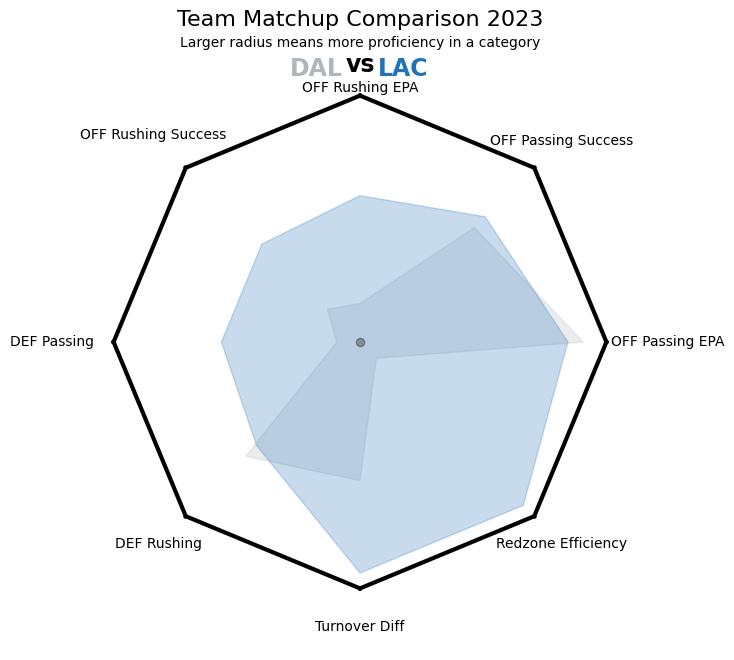

In [60]:
def matchup(inp1, inp2):
  matchup = fin_ranks[fin_ranks["team"].isin([inp1, inp2])]

  teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
            'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
            'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
            'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
            'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
            'TEN':'#4095D1','WAS':'#FFC20F'}

  tm_colors = [teamcolor.get(team) for team in matchup["team"]]

  categories = ["off_passing_rank", "pass_success_rank", "off_rushing_rank", "rush_success_rank", "def_passing_rank", "def_rushing_rank", "turnover_rank", "redzone_eff_rank"]
  data = matchup.loc[:, categories].values

  first_column = data[:, 0]

  # Append the first column to the end
  data = np.hstack((data, first_column.reshape(-1, 1)))

  category_count = len(list(matchup.columns[1:]))

  labels = ['OFF Passing EPA', "OFF Passing Success", 'OFF Rushing EPA', 'OFF Rushing Success', 'DEF Passing', 'DEF Rushing', 'Turnover Diff', "Redzone Efficiency"]

  # Create a list of angles for each category
  angles = [n / float(category_count) * 2 * np.pi for n in range(category_count)]
  angles += angles[:1]


  # Make the plot
  fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))


  # Plot the data
  for i in range(len(data)):
    ax.fill(angles, data[i], color=tm_colors[i], alpha=0.25)

  # Add a main title
  ax.set_title('Team Matchup Comparison 2023', fontsize=16)

  # Add a subtitle
  subtitle = 'Larger radius means more proficiency in a category'
  plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

  # Add labels
  ax.text(angles[0], 40, labels[0], ha='center', va='center')
  ax.text(angles[1], 37, labels[1], ha='center', va='center')
  ax.text(angles[2], 33, labels[2], ha='center', va='center')
  ax.text(angles[3], 38, labels[3], ha='center', va='center')
  ax.text(angles[4], 40, labels[4], ha='center', va='center')
  ax.text(angles[5], 37, labels[5], ha='center', va='center')
  ax.text(angles[6], 37, labels[6], ha='center', va='center')
  ax.text(angles[7], 37, labels[7], ha='center', va='center')

  # Matchup
  color1 = teamcolor.get(inp1)
  color2 = teamcolor.get(inp2)

  x = np.pi / 2
  y = 36

  ax.text(x - np.pi/20, y, inp1, ha='center', va='center', fontsize=17, weight='bold', color=color1)
  ax.text(x + np.pi/20, y, inp2, ha='center', va='center', fontsize=17, weight='bold', color=color2)
  ax.text(x, y, "vs", ha='center', va='center', fontsize=17, weight='bold', color="k")



  plt.scatter(0, 0, c='k', alpha = 0.3, marker='o')

  oct_coords = [
      (0, 32),
      (np.pi / 4, 32),
      ( np.pi / 2, 32),
      (3*np.pi / 4, 32),
      (np.pi, 32),
      (5 * np.pi / 4, 32),
      (3 * np.pi / 2, 32),
      (7 * np.pi / 4, 32),
  ]

  # Add lines connecting the vertices of the hex
  for i in range(len(oct_coords) - 1):
      x1, y1 = oct_coords[i]
      x2, y2 = oct_coords[i + 1]
      ax.plot([x1, x2], [y1, y2], color='k', linewidth=3)

  # Connect the last point to the first point
  x1, y1 = oct_coords[-1]
  x2, y2 = oct_coords[0]
  ax.plot([x1, x2], [y1, y2], color='k', linewidth=3)

  ax.yaxis.grid(True, linestyle='-', alpha=0.0, color='none')
  ax.xaxis.grid(True, linestyle='-', alpha=0.0, color='none')

  ax.spines['polar'].set_visible(False)

  plt.ylim(0, 40)
  ax.set_yticks(np.arange(0, 40, 2))

  ax.set_yticklabels([])
  ax.set_xticklabels([])

  # Show the plot
  plt.show()

inp1 = input("First Team Abbreviation: ")
inp2 = input("Second Team Abbreviation: ")

matchup(inp1, inp2)